# Base de dados do IMDB: Uma análise crítica

# 1. Carregando a base de dados

In [4]:
#importando para meu código o módulo que me permite manipular arquivos no Colab
from google.colab import files
#importando biblioteca pandas para facilitar a leitura das tabelas
import pandas as pd

#chamada para fazer upload da base de dados
upload_dos_dados = files.upload()

#transformando em um dataframe, carrega a base de dados na biblioteca pandas
df = pd.read_csv("imdb.csv")

#visualizando as primeiras linhas para conferir se a base de dados carregou
df.head()

Saving imdb.csv to imdb.csv


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


# 2. Realizando limpeza de dados desnecessários

- Ao receber uma base de dados, é fundamental organizar e limpar dados que estejam inconsistentes e que podem futuramente prejudicar o desempenho do modelo. Portanto, esta seção é voltada para a realização de análise exploratória e limpeza de dados.

## 2.1 Visualização geral da base de dados

In [5]:
#exibição na tela para visulizar a quantidade de linhas e colunas (dimensão)
print(df.shape)

#visualizar informações gerais da base para facilitar a identificação
print(df.info())

(999, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB
None


## 2.2 Verificação de valores nulos

In [6]:
#Vai somar e retornar o total de valores nulos em cada coluna
print(df.isnull().sum())

#mudando o estado de dados nulos para "Não informado"
df["Certificate"] = df["Certificate"].fillna("Não informado")

#Garante que a coluna 'Gross' existe (essa linha não altera nada, só referencia)
df["Gross"] = df["Gross"]

#Substitui valores nulos na coluna 'Gross' por "Sem informação"
#Isso permite tratar dados faltantes de forma consistente sem gerar erros
df["Gross"].fillna("Sem informação")

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


,Gross
0,"134,966,411"
1,"534,858,444"
2,"57,300,000"
3,"4,360,000"
4,"377,845,905"
...,...
994,Sem informação
995,Sem informação
996,"30,500,000"
997,Sem informação


## 2.3 Verificação de duplicados

- Dados duplicados são um tipo de ruído que podem prejudicar o aprendizado do modelo, pois aprendendo com valores exatamente iguais ele poderá generalizar de maneira incorreta.

In [7]:
#Somando e retornando o total de duplicadas presentes nas colunas
print(df.duplicated().sum())

#Removendo duplicadas do dataframe
df = df.drop_duplicates()

0


- Nesse caso, foi possível observar que não existem dados duplicados nas colunas, ou seja, esse tipo de ruído não vai interferir a predição do modelo.

## 2.4 Verificando escrita inconsistente

- É importante padronizar os valores das colunas, pois caso contrário podem ocorrer situações em que o modelo não reconhece corretamente certas informações.

In [8]:
#exibe todos os valores únicos antes da padronização escrita
print(df['Certificate'].unique())

#transforma todos os valores em letra maiúscula e remove espaços em branco antes e depois do texto
df['Certificate'] = df['Certificate'].str.upper().str.strip()

#visualização para ver que a padronização foi aplicada corretamente
print("Após padronização de escrita:")
print(df['Certificate'].unique())

['A' 'UA' 'U' 'PG-13' 'R' 'Não informado' 'PG' 'G' 'Passed' 'TV-14' '16'
 'TV-MA' 'Unrated' 'GP' 'Approved' 'TV-PG' 'U/A']
Após padronização de escrita:
['A' 'UA' 'U' 'PG-13' 'R' 'NÃO INFORMADO' 'PG' 'G' 'PASSED' 'TV-14' '16'
 'TV-MA' 'UNRATED' 'GP' 'APPROVED' 'TV-PG' 'U/A']


## 2.5 Procurando ruídos

In [9]:
#Exibe estatísticas descritivas das colunas numéricas do DataFrame
#Inclui contagem, média, desvio padrão, mínimo, quartis e máximo
print(df.describe())

#Considera ruídos notas menores que 0 ou maiores que 10
ruidos_notas = df[(df['IMDB_Rating'] < 0) | (df['IMDB_Rating'] > 10)]

#Mostra a quantidade de registros com notas inválidas
print("Ruídos em notas IMDB:", ruidos_notas.shape[0])

#Ruídos em Released_Year
#Converte para numérico (valores inválidos viram NaN)
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

#Considera ruídos anos fora do intervalo plausível de filmes (antes de 1895 ou após 2025)
ruidos_anos = df[(df['Released_Year'] < 1895) | (df['Released_Year'] > 2025)]

#Mostra a quantidade de registros com anos inválidos
print("Ruídos em anos:", ruidos_anos.shape[0])

#Ruídos em Runtime
#Extrai números da coluna 'Runtime' e converte para float
df['Runtime_min'] = df['Runtime'].str.extract(r'(\d+)').astype(float)

#Considera ruídos durações menores ou iguais a 0
ruidos_duracao = df[df['Runtime_min'] <= 0]

#Mostra a quantidade de registros com durações inválidas
print("Ruídos em duração:", ruidos_duracao.shape[0])

       Unnamed: 0  IMDB_Rating  Meta_score   No_of_Votes
count  999.000000   999.000000  842.000000  9.990000e+02
mean   500.000000     7.947948   77.969121  2.716214e+05
std    288.530761     0.272290   12.383257  3.209126e+05
min      1.000000     7.600000   28.000000  2.508800e+04
25%    250.500000     7.700000   70.000000  5.547150e+04
50%    500.000000     7.900000   79.000000  1.383560e+05
75%    749.500000     8.100000   87.000000  3.731675e+05
max    999.000000     9.200000  100.000000  2.303232e+06
Ruídos em notas IMDB: 0
Ruídos em anos: 0
Ruídos em duração: 0


## 2.6 Conversão numérica
- Explicar porquê

In [10]:
#Converte a coluna 'Released_Year' para numérico (int ou float)
#'errors="coerce"' transforma valores inválidos em NaN
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

#Exibe as primeiras linhas para conferir a conversão
print("Released_Year convertido para numérico:")
print(df['Released_Year'].head(), "\n")

#Cria uma nova coluna 'Runtime_min' extraindo apenas números da coluna 'Runtime'
#Isso transforma strings como '120 min' em 120.0
df['Runtime_min'] = df['Runtime'].str.extract(r'(\d+)').astype(float)

#Exibe as primeiras linhas para conferir a conversão
print("Runtime em minutos:")
print(df[['Runtime','Runtime_min']].head(), "\n")

#Limpa a coluna 'Gross', removendo cifrão e vírgulas, e converte para float
#Isso transforma strings como '$1,234,567' em 1234567.0
df['Gross_clean'] = df['Gross'].str.replace(r'[$,]', '', regex=True).astype(float)

#Exibe as primeiras linhas para conferir a conversão
print("Gross convertido para float:")
print(df[['Gross','Gross_clean']].head())

Released_Year convertido para numérico:
0    1972.0
1    2008.0
2    1974.0
3    1957.0
4    2003.0
Name: Released_Year, dtype: float64 

Runtime em minutos:
   Runtime  Runtime_min
0  175 min        175.0
1  152 min        152.0
2  202 min        202.0
3   96 min         96.0
4  201 min        201.0 

Gross convertido para float:
         Gross  Gross_clean
0  134,966,411  134966411.0
1  534,858,444  534858444.0
2   57,300,000   57300000.0
3    4,360,000    4360000.0
4  377,845,905  377845905.0


# 3. Análise de insights extraídos das informações

- Após análise exploratória, esta seção está dedicada a um complemento do que pode ser visto na base de dados antes de iniciar a separação para treinamento e teste.

## 3.1 O que os gráficos podem indicar?

### 3.1.1 Gráfico de Boxplot

- Gráficos de boxplot são ótimos para identificar outliers. Em casos extremos de muitos outliers, pode ser necessário considerá-los ou apagá-los.

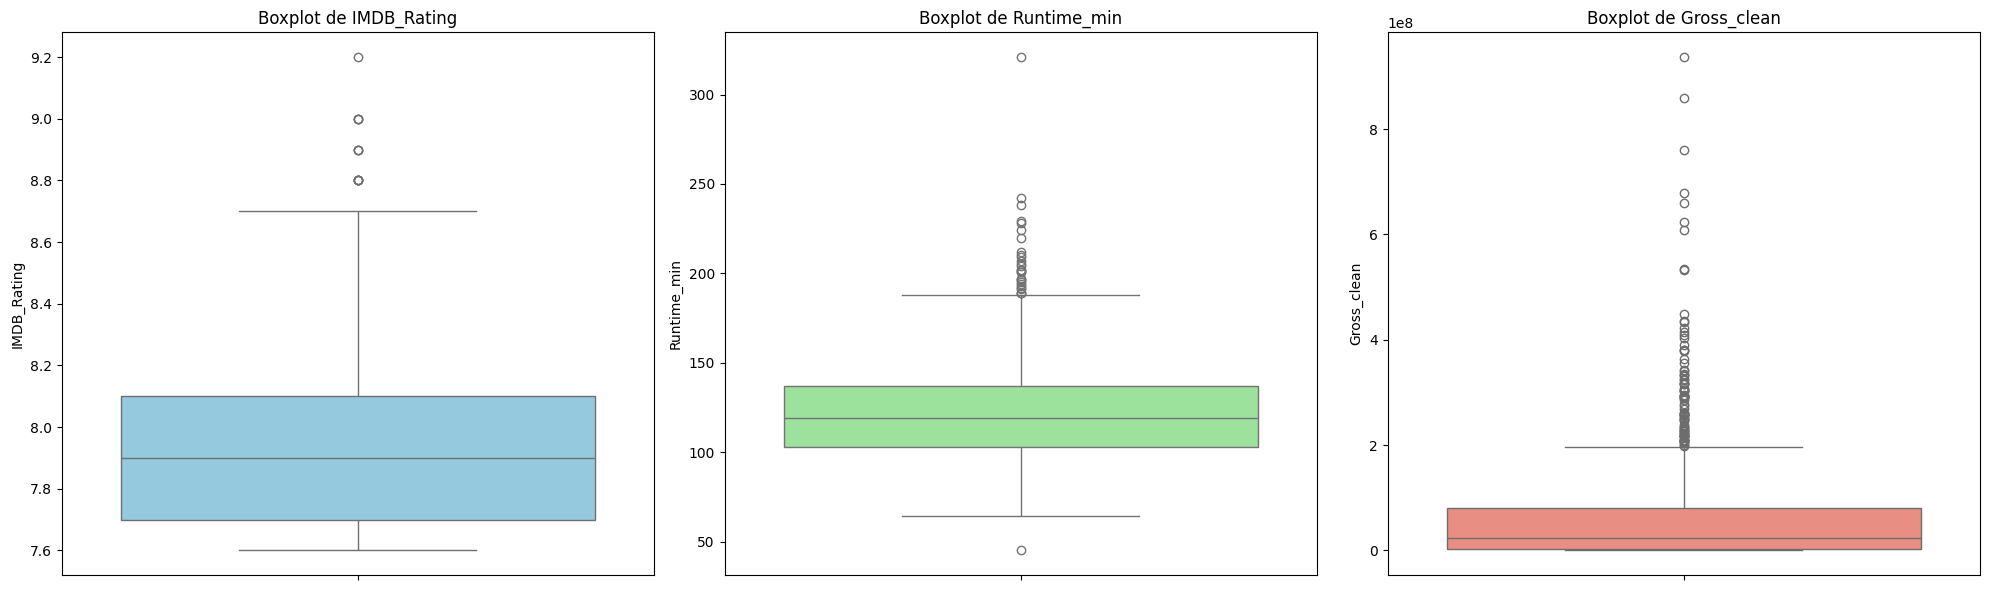

In [11]:
#Importa as bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

#Cria uma figura com 1 linha e 3 colunas de subplots, definindo o tamanho da figura
fig, axes = plt.subplots(1, 3, figsize=(20,6))

#Cria um boxplot da coluna 'IMDB_Rating' no primeiro subplot (axes[0])
#Boxplot ajuda a visualizar a distribuição, mediana e possíveis outliers
sns.boxplot(y=df['IMDB_Rating'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot de IMDB_Rating')

#Cria um boxplot da coluna 'Runtime_min' no segundo subplot (axes[1])
sns.boxplot(y=df['Runtime_min'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot de Runtime_min')

#Cria um boxplot da coluna 'Gross_clean' no terceiro subplot (axes[2])
sns.boxplot(y=df['Gross_clean'], ax=axes[2], color='salmon')
axes[2].set_title('Boxplot de Gross_clean')

#Ajusta o layout para que os elementos não fiquem sobrepostos
plt.tight_layout()
#Exibe os gráficos
plt.show()

- Através da análise de boxplots é possível identificar números que estão fora da média. Esses são os outliers.
- Contudo, para que o modelo também possa considerar filmes que estejam fora da média de notas e assim consiga prever notas maiores, os outliers serão mantidos.

### 3.1.2 Gráficos de barras

- Com gráficos de barras, é possível visualizar em posições os top 10 gêneros mais frequentes e o maior tipo de distribuição da classificação indicativa.

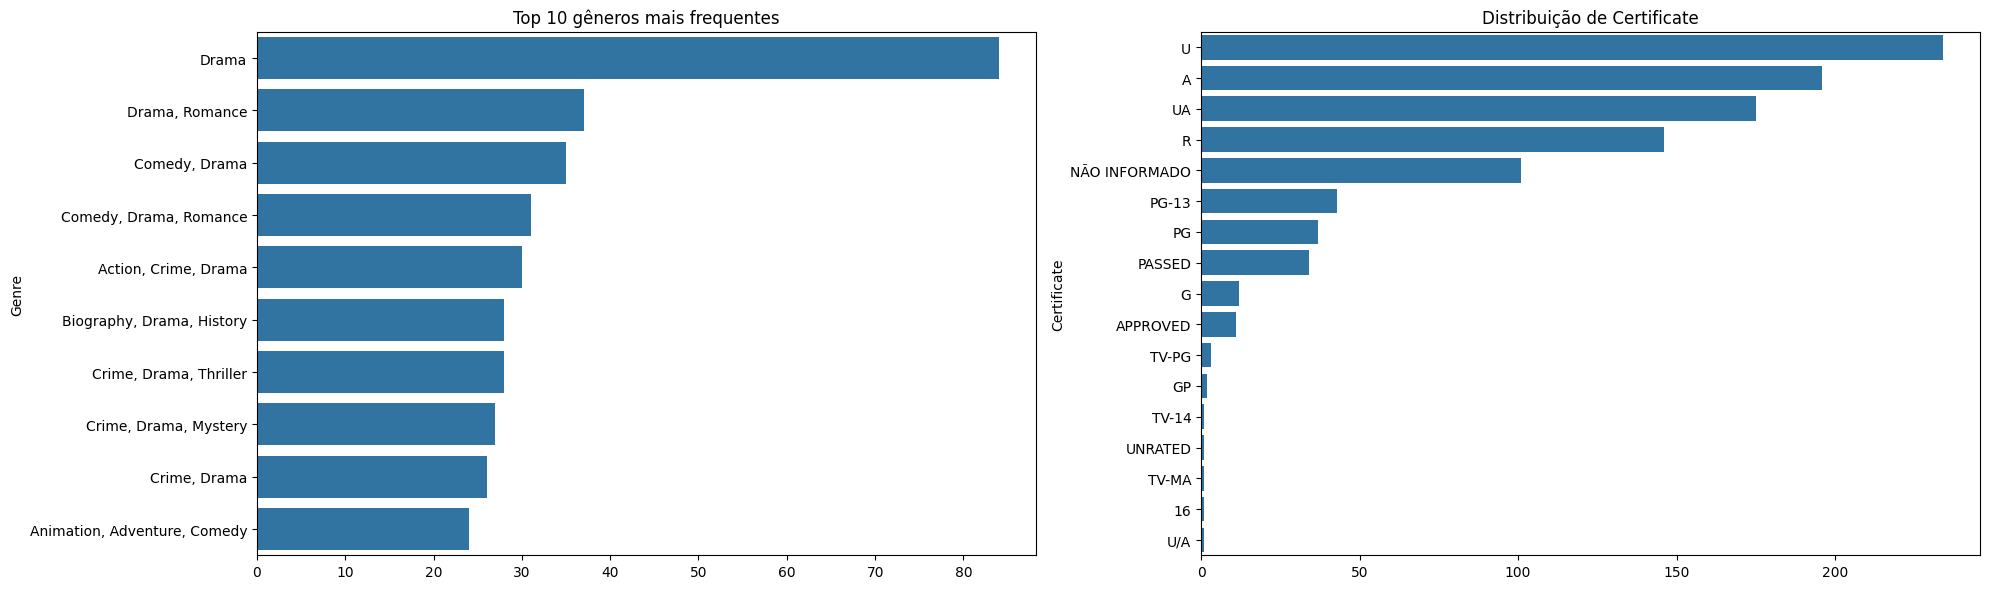

In [12]:
#Cria uma figura com 1 linha e 2 colunas de subplots, definindo o tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(20,6))

#Conta a frequência de cada gênero e seleciona os 10 mais comuns
top_genres = df['Genre'].value_counts().nlargest(10)

#Cria um gráfico de barras horizontal mostrando os 10 gêneros mais frequentes
#axes[0] indica que o gráfico será desenhado no primeiro subplot
sns.barplot(x=top_genres.values, y=top_genres.index, ax=axes[0])

#Define o título do primeiro gráfico
axes[0].set_title('Top 10 gêneros mais frequentes')

#Conta a frequência de cada certificado (faixa etária)
cert_counts = df['Certificate'].value_counts()

#Cria um gráfico de barras horizontal mostrando a distribuição de certificados
#axes[1] indica que o gráfico será desenhado no segundo subplot
sns.barplot(x=cert_counts.values, y=cert_counts.index, ax=axes[1])

#Define o título do segundo gráfico
axes[1].set_title('Distribuição de Certificate')

#Ajusta o layout para que os elementos não fiquem sobrepostos
plt.tight_layout()

#Exibe os gráficos
plt.show()

- É visto que o gênero de drama é o mais frequenta na base de dados e a classificação indicativa mais presente é a livre para todos os públicos (U).

# 3.2 Filmes maiores em duração tem maiores notas?

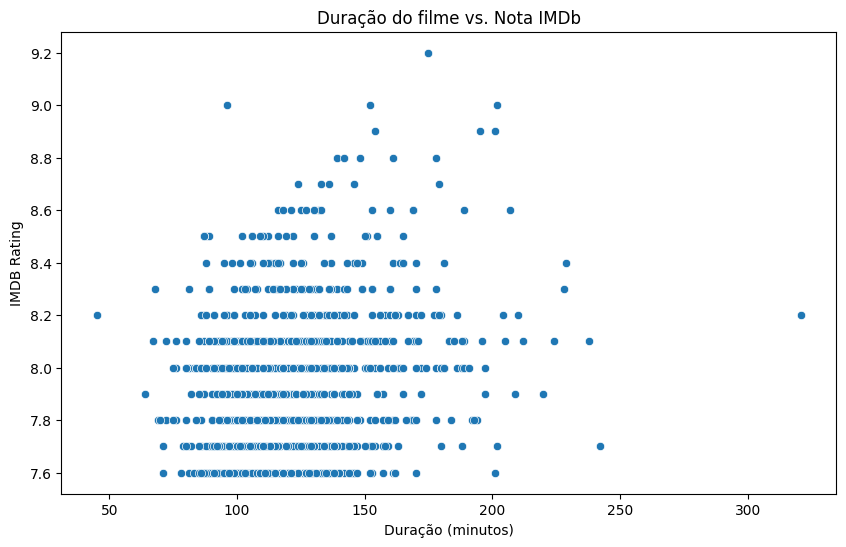

Correlação entre duração e nota IMDb: 0.24275124465497622


In [13]:
#Define o tamanho da figura do gráfico
plt.figure(figsize=(10,6))

#Cria um gráfico de dispersão (scatterplot) relacionando a duração do filme (x) com a nota IMDb (y)
sns.scatterplot(x='Runtime_min', y='IMDB_Rating', data=df)

#Adiciona título ao gráfico
plt.title("Duração do filme vs. Nota IMDb")

#Define o rótulo do eixo X
plt.xlabel("Duração (minutos)")

#Define o rótulo do eixo Y
plt.ylabel("IMDB Rating")

#Exibe o gráfico de dispersão
plt.show()

#Calcula a correlação numérica entre a duração do filme e a nota IMDb
correlacao_numerica = df['Runtime_min'].corr(df['IMDB_Rating'])

#Visualizando essa correlação
print("Correlação entre duração e nota IMDb:", correlacao_numerica)

# 3.3 Filmes de determinados gêneros recebem mais votos?
- Existe algum gênero preferido do público? O gráfico será montado para analisar este tópico e obter mais insights.

Genre
Sci-Fi       556242.477612
Adventure    424952.954082
Action       404172.412698
Fantasy      347097.060606
Thriller     300050.744526
Mystery      293463.363636
Crime        281322.124402
Animation    268032.073171
Sport        256618.684211
Biography    251898.550459
Drama        237821.820194
Western      229475.800000
Comedy       225465.965665
Family       223472.107143
Horror       217860.625000
Romance      200913.144000
History      195434.803571
War          194244.509804
Music        139281.685714
Film-Noir     80185.210526
Musical       79613.588235
Name: No_of_Votes, dtype: float64


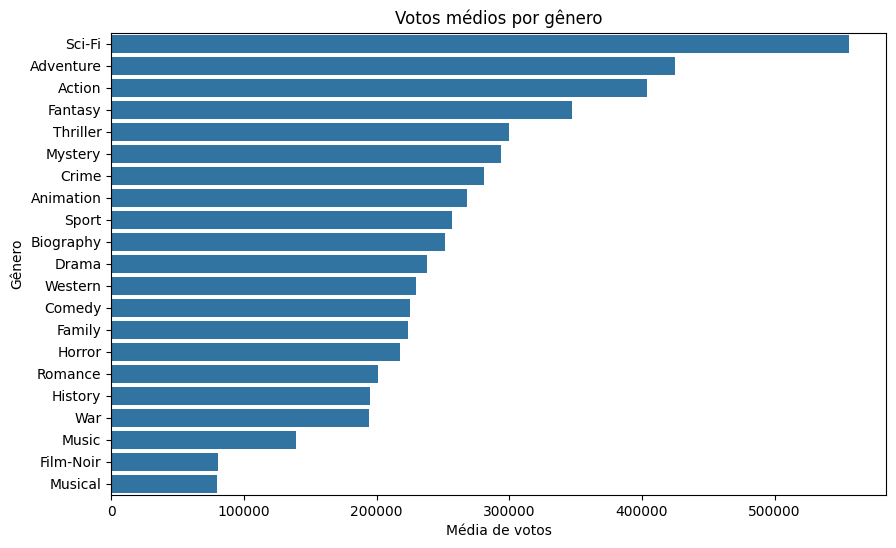

In [14]:
#Cria uma cópia do DataFrame original para evitar modificar diretamente o df
df_genres = df.copy()

#Divide a coluna 'Genre' em uma lista de gêneros, separando por vírgula
df_genres['Genre'] = df_genres['Genre'].str.split(', ')

#"Explode" a lista de gêneros em linhas separadas (um gênero por linha)
df_genres = df_genres.explode('Genre')

#Agrupa os dados pelo gênero e calcula a média do número de votos para cada um
#Em seguida, ordena em ordem decrescente
votos_por_genero = df_genres.groupby('Genre')['No_of_Votes'].mean().sort_values(ascending=False)

#Exibe no console a média de votos por gênero
print(votos_por_genero)

#Define o tamanho da figura do gráfico
plt.figure(figsize=(10,6))

#Cria um gráfico de barras com os gêneros no eixo Y e a média de votos no eixo X
sns.barplot(x=votos_por_genero.values, y=votos_por_genero.index)

#Adiciona título e rótulos aos eixos
plt.title("Votos médios por gênero")
plt.xlabel("Média de votos")
plt.ylabel("Gênero")

#Exibe o gráfico
plt.show()

- Através da análise gráfica e da numeração, foi possível perceber que filmes de Ficção Científica foram mais votados nesse conjunto de dados.

# 4. Resposta às perguntas de análise

- Esta seção e as seguintes serão utilizadas para responder às perguntas feitas na documentação do teste.

## 4.1 Qual filme você recomendaria para uma pessoa que não conhece?

- Para recomendar um filme para alguém que não conhecemos, é importante considerar alguns fatores primeiro, como: gênero, duração, número de votos e a nota do filme no site.

- Normalmente poderia ser recomendado um filme com boa nota, com um gênero já conhecido e com um grande número de votações.

- Pensando nisso, foi feito um sorteio aleatório que obedece algumas condições, como verificação de nota no IMDb sendo maior ou igual a 8 e o número de votações maior ou igual a 50.000.

In [73]:
#Criação de variável para filtragem de filme
#Considera o filme com nota maior ou igual a 8
#Considera o numero de votos maior ou igual a 50000
#Com base nisso, sorteia um filme com nota muito alta
filme_recomendado = df[(df["IMDB_Rating"] >= 8) & (df["No_of_Votes"] >= 50000)]

#Sorteando o filme, exibe seu título, nota e número de votos
filme_recomendado.sort_values(by= "IMDB_Rating", ascending=False)[["Series_Title", "IMDB_Rating", "No_of_Votes"]].head(1)

,Series_Title,IMDB_Rating,No_of_Votes
0,The Godfather,9.2,1620367


## 4.2 Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

- É possível inferir que gêneros de maior relevância, como ação, aventura e ficção científica, estão entre os mais populares e tendem a despertar maior interesse do público.

- O número de votos pode ser um fator relevante, pois quanto mais pessoas assistem a um determinado filme, maior é a sua visibilidade e, consequentemente, mais atenção ele tende a atrair de novos espectadores.

- Outro fator relevante é a duração do filme. Produções mais longas, em alguns casos, podem não conseguir manter a atenção do público ao longo do tempo, o que leva parte dos espectadores a perder o interesse. Dessa forma, esse tipo de filme tende a atrair apenas um grupo mais restrito de pessoas.

## 4.3 O que é possível inferir da coluna *Overview?* É possível inferir o gênero do filme a partir dessa coluna?

- A coluna *Overview* corresponde a uma breve sinopse do filme, cujo objetivo é apresentar de forma resumida a trama principal e situar o espectador.

- A partir desse texto, é possível, em muitos casos, inferir o gênero do filme, já que a forma de descrever a história costuma variar conforme a proposta. Por exemplo, sinopses de filmes de suspense tendem a ser mais enigmáticas e revelam pouco da trama; filmes de ação geralmente destacam os conflitos e acontecimentos intensos; enquanto sinopses de comédia adotam uma abordagem mais leve e divertida, transmitindo o tom cômico da produção.

# 5. Como realizar a previsão das notas do IMDb?

- No momento de prever a nota de um filme, é preciso pensar no que considerar para que o modelo possa ser o mais assertivo possível.

## 5.1 Regressão ou Classificação?

- O tipo de problema de predição aqui é o de REGRESSÃO, pelo fato de se tratarem de valores numéricos (0 a 10) contínuos.

## 5.2 Fatores que influenciam na decisão de uma nota

- Para as variáveis a serem utilizadas, é importante considerar alguns fatores que podem influenciar no momento de decisão de uma nota. Dessa forma, as possíveis variáveis mais importantes seriam:
  * Released_Year: o ano de lançamento pode influenciar a nota, pois filmes mais antigos podem ser avaliados de forma diferente em relação aos atuais (nostalgia, padrão de produção da época, etc.).

  * Runtime_min: a duração do filme pode afetar a experiência do público, impactando a percepção da qualidade.

  * Meta_score: fornece uma avaliação crítica profissional que tende a se correlacionar com a opinião do público.

  * No_of_Votes: o número de votos representa a popularidade do filme e ajuda a reduzir distorções em notas com poucas avaliações.

  * Gross_clean: a arrecadação pode ser um indicativo de aceitação do público, podendo influenciar indiretamente na nota.

  * Certificate: a classificação indicativa pode afetar o alcance do público e o tipo de crítica recebida.

  * Genre: o gênero do filme influencia as expectativas do público, já que certos gêneros são avaliados de forma mais rigorosa ou mais branda.



## 5.3 Qual modelo melhor se aproxima dos dados? Quais seus prós e contras?

- Um bom exemplo de modelo que poderia satisfazer a resolução do problema seria o Random Forest Regression

    - Pró: funciona muito bem com dados categóricos e são menos propensas a overfitting.

    - Contra: pode demandar mais processamento e ser mais difícil de interpretar.

## 5.4 Qual melhor medida a ser usada para o modelo e por quê?

- A métrica escolhida foi o RMSE (Root Mean Squared Error), pois com essa métrica é possível impedir alterações muito grosseiras e que atrapalham o resultado final. Por exemplo: um filme que pode perder ou ganhar até 2 pontos na avaliação é um erro grosseiro considerando uma crítica que utiliza de 0 a 10. Dessa forma, essa métrica pode ajudar na análise de forma que esses desvios não aconteçam.

# 6.Teste e predição do modelo Random Forest

## 6.1 Separação de Features(variáveis) e selecionando o Target(alvo)

In [18]:
#features numéricas + categóricas
X = df[['Released_Year', 'Runtime_min', 'Meta_score', 'No_of_Votes',
        'Gross_clean', 'Certificate', 'Genre']]

#Alvo
y = df['IMDB_Rating']

#transformar categorias em variáveis dummy(conversão para valores numéricos)
X = pd.get_dummies(X, columns=['Certificate', 'Genre'], drop_first=True)

#remover linhas com NaN(pois não vão ajudar na predição)
X = X.dropna()
y = y.loc[X.index]

## 6.2 Treino e Teste

In [71]:
#importando bibliotecas para chamar o modelo, o treino, o teste e a métrica
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


#dividindo os dados de treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#modelo Random Forest com ajustes nos hiperparâmetros
rf = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=2,
)

#Treina o modelo Random Forest com os dados de treino
#X_train: variáveis preditoras (features) do conjunto de treino
#y_train: variável alvo (target) do conjunto de treino
rf.fit(X_train, y_train)

#Faz a predição das notas para o conjunto de teste usando o modelo treinado
#y_pred vai conter os valores previstos pelo modelo
y_pred = rf.predict(X_test)

#métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#vai mostrar o quanto o modelo vai errar na predição da pontuação
print("RMSE:", rmse)

RMSE: 0.18862305039503532


- Com a métrica utilizada (RMSE), identificou-se que o modelo apresenta um erro médio de aproximadamente 0,19 em relação às notas reais.

- Esse resultado indica que as previsões do modelo tendem a ser bastante próximas dos valores observados, com baixa variação em relação ao valor real.

## 6.3 Predição - exemplo "The Shawshank Redemption"

In [74]:
#Exemplo de filme novo sendo catalogado
novo_filme = {
  'Series_Title': 'The Shawshank Redemption',
  'Released_Year': 1994,
  'Certificate': 'A',
  'Runtime_min': 142,
  'Genre': 'Drama',
  'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
  'Meta_score': 80.0,
  'Director': 'Frank Darabont',
  'Star1': 'Tim Robbins',
  'Star2': 'Morgan Freeman',
  'Star3': 'Bob Gunton',
  'Star4': 'William Sadler',
  'No_of_Votes': 2343110,
  'Gross': 28341469
}

#Transformar em DataFrame para receber o filme
novo_df = pd.DataFrame([novo_filme])

#Aplicar os mesmos dummies que no treino
novo_df = pd.get_dummies(novo_df, columns=['Certificate', 'Genre'], drop_first=True)

#Garantir que tenha as mesmas colunas que X (preenchendo ausentes com 0)
novo_df = novo_df.reindex(columns=X.columns, fill_value=0)

#Agora sim, prever
nota_prevista = rf.predict(novo_df)[0]
print("Nota prevista IMDb:", round(nota_prevista, 2))

Nota prevista IMDb: 8.81


- Com base na predição, o resultado obtido foi de 8.81.

- No site oficial IMDb, a nota para este filme é 9.3.

- Portanto, observa-se que o modelo apresentou um pequeno desvio na avaliação, mesmo após o uso das métricas adequadas e do treinamento com as variáveis selecionadas. Embora tenha conseguido se aproximar da nota oficial, o modelo ainda não foi capaz de reconhecer plenamente filmes com avaliações muito elevadas.

# Final - salvamento em modelo .pkl e requirements

In [75]:
from joblib import dump
from google.colab import files

# Salva o modelo treinado
dump(rf, 'modelo_filmes.pkl')

files.download('modelo_filmes.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
!pip freeze > requirements.txt

In [77]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>